<a href="https://colab.research.google.com/github/michaelsyao/AI_in_Finance/blob/main/03_normative_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Normative Finance

### Uncertainty and Risk

In [117]:
import numpy as np

In [118]:
S0 = 10
B0 = 10

In [119]:
S1 = np.array((20, 5))
B1 = np.array((11, 11))

In [120]:
M0 = np.array((S0, B0))
M0

array([10, 10])

In [121]:
M1 = np.array((S1, B1)).T
M1

array([[20, 11],
       [ 5, 11]])

In [122]:
K = 14.5

In [123]:
C1 = np.maximum(S1 - K, 0)
C1

array([5.5, 0. ])

In [124]:
phi = np.linalg.solve(M1, C1)
phi

array([ 0.36666667, -0.16666667])

In [125]:
np.allclose(C1, np.dot(M1, phi))

True

In [126]:
C0 = np.dot(M0, phi)
C0

2.0

## Expected Utility Theory

In [127]:
def u(x):
    return np.sqrt(x)

In [128]:
phi_A = np.array((0.75, 0.25))
phi_D = np.array((0.25, 0.75))

In [129]:
np.dot(M0, phi_A) == np.dot(M0, phi_D)

True

In [130]:
A1 = np.dot(M1, phi_A)
A1

array([17.75,  6.5 ])

In [131]:
D1 = np.dot(M1, phi_D)
D1

array([13.25,  9.5 ])

In [132]:
P = np.array((0.5, 0.5))

In [133]:
def EUT(x):
    return np.dot(P, u(x))

In [134]:
EUT(A1)

3.381292321692286

In [135]:
EUT(D1)

3.3611309730623735

In [136]:
from scipy.optimize import minimize

In [137]:
w = 10

In [138]:
cons = {'type': 'eq', 'fun': lambda phi: np.dot(M0, phi) - w}

In [139]:
def EUT_(phi):
    x = np.dot(M1, phi)
    return EUT(x)

In [140]:
opt = minimize(lambda phi: -EUT_(phi),
               x0=phi_A,
               constraints=cons)

In [141]:
opt

     fun: -3.385015999493397
     jac: array([-1.69249132, -1.69253424])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.61122474, 0.38877526])

In [142]:
EUT_(opt['x'])

3.385015999493397

In [143]:
np.dot(M0, opt['x'])

10.0

## Mean-Variance Portfolio Theory

In [144]:
rS = S1 / S0 - 1
rS

array([ 1. , -0.5])

In [145]:
rB = B1 / B0 - 1
rB

array([0.1, 0.1])

In [146]:
def mu(rX):
    return np.dot(P, rX)

In [147]:
mu(rS)

0.25

In [148]:
mu(rB)

0.10000000000000009

In [149]:
rM = M1 / M0 - 1
rM

array([[ 1. ,  0.1],
       [-0.5,  0.1]])

In [150]:
mu(rM)

array([0.25, 0.1 ])

In [151]:
def var(rX):
    return ((rX - mu(rX)) ** 2).mean()

In [152]:
var(rS)

0.5625

In [153]:
var(rB)

0.0

In [154]:
def sigma(rX):
    return np.sqrt(var(rX))

In [155]:
sigma(rS)

0.75

In [156]:
sigma(rB)

0.0

In [157]:
np.cov(rM.T, aweights=P, ddof=0)

array([[0.5625, 0.    ],
       [0.    , 0.    ]])

In [158]:
phi = np.array((0.5, 0.5))

In [159]:
def mu_phi(phi):
    return np.dot(phi, mu(rM))

In [160]:
mu_phi(phi)

0.17500000000000004

In [161]:
def var_phi(phi):
    cv = np.cov(rM.T, aweights=P, ddof=0)
    return np.dot(phi, np.dot(cv, phi))

In [162]:
var_phi(phi)

0.140625

In [163]:
def sigma_phi(phi):
    return var_phi(phi) ** 0.5

In [164]:
sigma_phi(phi)

0.375

In [165]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [166]:
phi_mcs = np.random.random((2, 200))

In [167]:
phi_mcs = (phi_mcs / phi_mcs.sum(axis=0)).T

In [168]:
mcs = np.array([(sigma_phi(phi), mu_phi(phi))
                for phi in phi_mcs])

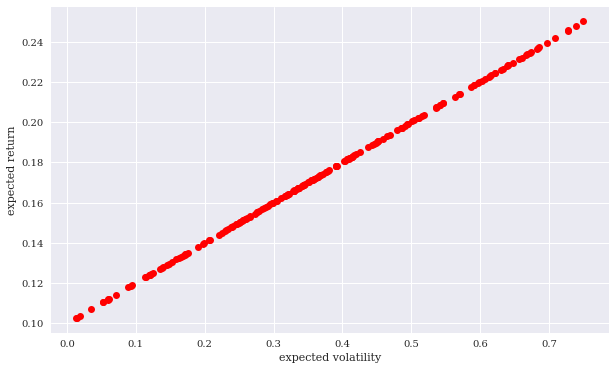

In [169]:
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro')
plt.xlabel('expected volatility')
plt.ylabel('expected return');

In [170]:
P = np.ones(3) / 3
P

array([0.33333333, 0.33333333, 0.33333333])

In [171]:
S1 = np.array((20, 10, 5))

In [172]:
T0 = 10
T1 = np.array((1, 12, 13))

In [173]:
M0 = np.array((S0, T0))
M0

array([10, 10])

In [174]:
M1 = np.array((S1, T1)).T
M1

array([[20,  1],
       [10, 12],
       [ 5, 13]])

In [175]:
rM = M1 / M0 - 1
rM

array([[ 1. , -0.9],
       [ 0. ,  0.2],
       [-0.5,  0.3]])

In [176]:
np.cov(rM.T, aweights=P, ddof=0)

array([[ 0.38888889, -0.32777778],
       [-0.32777778,  0.29555556]])

In [177]:
mcs = np.array([(sigma_phi(phi), mu_phi(phi))
                for phi in phi_mcs])

In [178]:
mu(rM)

array([ 0.16666667, -0.13333333])

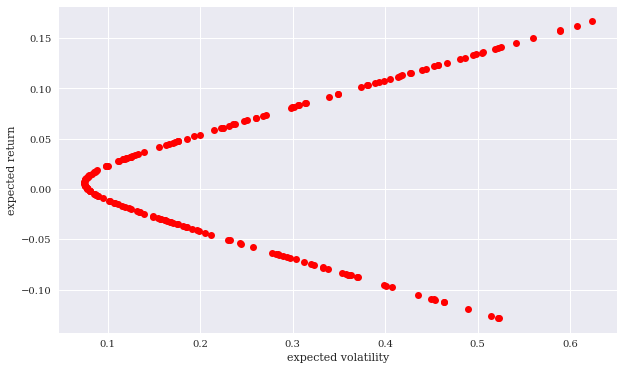

In [179]:
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro')
plt.xlabel('expected volatility')
plt.ylabel('expected return');

In [180]:
cons = {'type': 'eq', 'fun': lambda phi: np.sum(phi) - 1}

In [181]:
bnds = ((0, 1), (0, 1))

In [182]:
min_var = minimize(sigma_phi, (0.5, 0.5),
                   constraints=cons, bounds=bnds)

In [183]:
min_var

     fun: 0.07481322946905193
     jac: array([0.07426564, 0.07528945])
 message: 'Optimization terminated successfully.'
    nfev: 17
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.46511697, 0.53488303])

In [184]:
# Defines the sharpe ratio function, assuming a short rate of 0
def sharpe(phi):
    return mu_phi(phi) / sigma_phi(phi)

In [185]:
max_sharpe = minimize(lambda phi: -sharpe(phi), (0.5, 0.5),
               constraints=cons, bounds=bnds)

In [186]:
max_sharpe

     fun: -0.2721654099067235
     jac: array([ 0.00012052, -0.00024173])
 message: 'Optimization terminated successfully.'
    nfev: 38
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.66731113, 0.33268887])

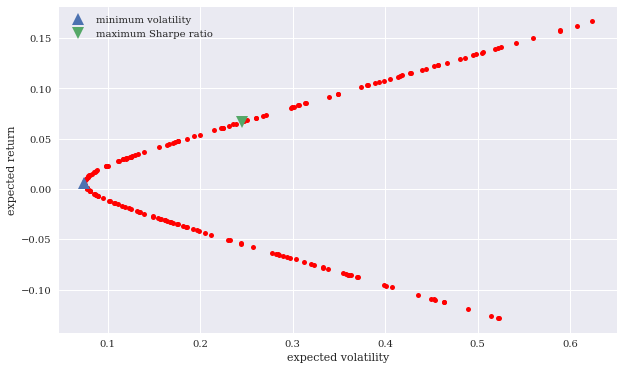

In [187]:
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro', ms=5)
plt.plot(sigma_phi(min_var['x']), mu_phi(min_var['x']),
         '^', ms=12.5, label='minimum volatility')
plt.plot(sigma_phi(max_sharpe['x']), mu_phi(max_sharpe['x']),
         'v', ms=12.5, label='maximum Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

In [188]:
cons = [{'type': 'eq', 'fun': lambda phi: np.sum(phi) - 1},
       {'type': 'eq', 'fun': lambda phi: mu_phi(phi) - target}]

In [189]:
bnds = ((0, 1), (0, 1))

In [190]:
targets = np.linspace(mu_phi(min_var['x']), 0.16)

In [191]:
frontier = []
for target in targets:
    phi_eff = minimize(sigma_phi, (0.5, 0.5),
                       constraints=cons, bounds=bnds)['x']
    frontier.append((sigma_phi(phi_eff), mu_phi(phi_eff)))
frontier = np.array(frontier)

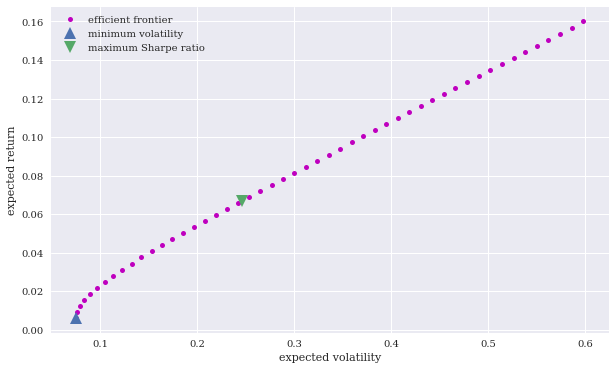

In [192]:
plt.figure(figsize=(10, 6))
plt.plot(frontier[:, 0], frontier[:, 1], 'mo', ms=5,
         label='efficient frontier')
plt.plot(sigma_phi(min_var['x']), mu_phi(min_var['x']),
         '^', ms=12.5, label='minimum volatility')
plt.plot(sigma_phi(max_sharpe['x']), mu_phi(max_sharpe['x']),
         'v', ms=12.5, label='maximum Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

## Capital Asset Pricing Model

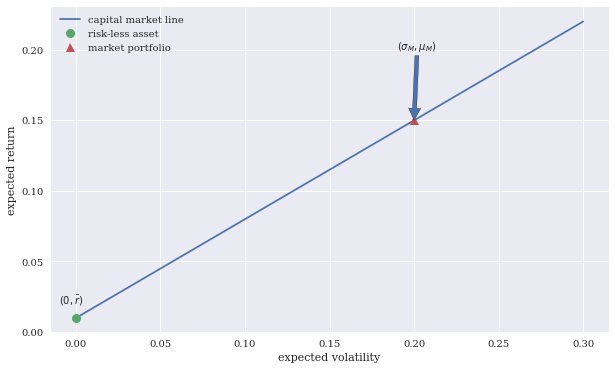

In [193]:
plt.figure(figsize=(10, 6))
plt.plot((0, 0.3), (0.01, 0.22), label='capital market line')
plt.plot(0, 0.01, 'o', ms=9, label='risk-less asset')
plt.plot(0.2, 0.15, '^', ms=9, label='market portfolio')
plt.annotate('$(0, \\bar{r})$', (0, 0.01), (-0.01, 0.02))
plt.annotate('$(\sigma_M, \mu_M)$', (0.2, 0.15), (0.19, 0.2), arrowprops = dict())
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

## Capital Market Line

In [194]:
r = 0.0025

In [195]:
cons = {'type': 'eq',
       'fun': lambda phi: np.sum(phi) - 1}

In [196]:
# Defines the sharpe ratio function, assuming a short rate of 0
def sharpe(phi):
    return mu_phi(phi) / sigma_phi(phi)

In [197]:
max_sharpe = minimize(lambda phi: -sharpe(phi), (0.5, 0.5),
               constraints=cons, bounds=bnds)

In [198]:
phi_M = np.array((0.8, 0.2))

In [199]:
mu_M = mu_phi(phi_M)
mu_M

0.10666666666666666

In [200]:
sigma_M = sigma_phi(phi_M)
sigma_M

0.39474323581566567

In [201]:
r = 0.0025

In [202]:
(mu_M - r)/ sigma_M

0.2638846146443144

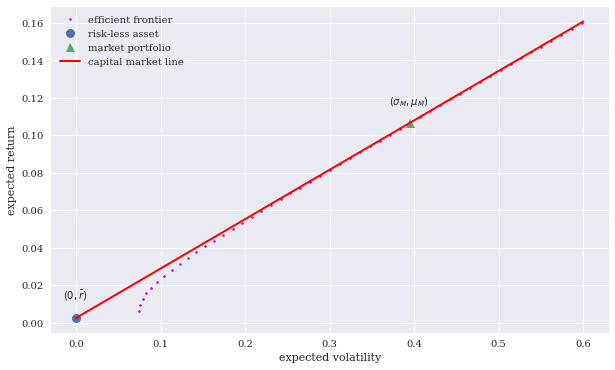

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(frontier[:, 0], frontier[:, 1], 'm.', ms=5,
         label='efficient frontier')
plt.plot(0, r, 'o', ms=9, label='risk-less asset')
plt.plot(sigma_M, mu_M, '^', ms=9, label='market portfolio')
plt.plot((0, 0.6), (r, r + ((mu_M - r) / sigma_M) * 0.6),
         'r', label='capital market line', lw=2.0)
plt.annotate('$(0, \\bar{r})$', (0, r), (-0.015, r + 0.01))
plt.annotate('$(\sigma_M, \mu_M)$', (sigma_M, mu_M),
             (sigma_M - 0.025, mu_M + 0.01))
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

In [90]:
def U(p):
    mu, sigma = p
    return mu - 1 / 2 * (sigma ** 2 + mu ** 2)

In [91]:
cons = {'type': 'eq',
        'fun': lambda p: p[0] - (r + (mu_M - r) / sigma_M * p[1])}

In [93]:
opt = minimize(lambda p: -U(p), (0.1, 0.3), constraints=cons)
opt

     fun: -0.034885186826739426
     jac: array([-0.93256102,  0.24608851])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.06743897, 0.2460885 ])

In [107]:
# Slope of Tagent Line = - (dU/d(sigma) / (dU/d(mu)))
-opt['jac'][1]/opt['jac'][0]

0.2638846144687371

In [209]:
from sympy import *
init_printing(use_unicode=False, use_latex=False)

In [210]:
mu, sigma, b, v = symbols('mu sigma b v')

In [211]:
mu, sigma, b, v

(mu, sigma, b, v)

In [212]:
sol = solve('mu - b / 2 * (sigma ** 2 + mu ** 2) - v', mu)
sol

        _________________________     _________________________     
       /    2      2                 /    2      2                  
 1 - \/  - b *sigma  - 2*b*v + 1   \/  - b *sigma  - 2*b*v + 1  + 1 
[--------------------------------, --------------------------------]
                b                                 b                 

In [213]:
u1 = sol[0].subs({'b': 1, 'v': 0.1})
u1

       ______________
      /            2 
1 - \/  0.8 - sigma  

In [218]:
u2 = sol[0].subs({'b': 1, 'v': 0.125})
u2

       _______________
      /             2 
1 - \/  0.75 - sigma  

In [219]:
f1 = lambdify(sigma, u1)
f2 = lambdify(sigma, u2)

In [238]:
sigma_ = np.linspace(0.0, 0.5)
u1_ = f1(sigma_)
u2_ = f2(sigma_)

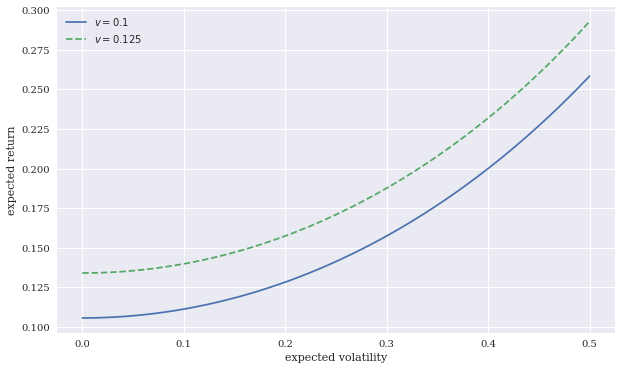

In [239]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_, u1_, label='$v=0.1$')
plt.plot(sigma_, u2_, '--', label='$v=0.125$')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

In [240]:
u = sol[0].subs({'b': 1, 'v': -opt['fun']})
u

                        ________________________________
                       /                          2     
1 - 2.40208909055988*\/  - 0.173309264173162*sigma  - 1 

In [241]:
f = lambdify(sigma, u)

In [242]:
u_ = f(sigma_)

<string>:2: RuntimeWarning: invalid value encountered in sqrt


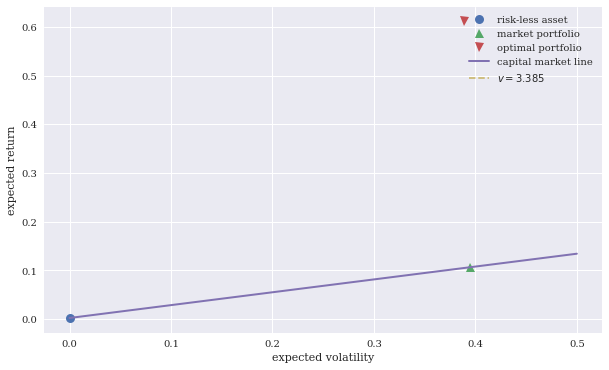

In [230]:
plt.figure(figsize=(10, 6))
plt.plot(0, r, 'o', ms=9, label='risk-less asset')
plt.plot(sigma_M, mu_M, '^', ms=9, label='market portfolio')
plt.plot(opt['x'][1], opt['x'][0], 'v', ms=9, label='optimal portfolio')
plt.plot((0, 0.5), (r, r + (mu_M - r) / sigma_M * 0.5),
         label='capital market line', lw=2.0)
plt.plot(sigma_, u_, '--', label='$v={}$'.format(-round(opt['fun'], 3)))
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

## Arbitrage Pricing Theory

In [243]:
M1

array([[20,  1],
       [10, 12],
       [ 5, 13]])

In [244]:
M0

array([10, 10])

In [245]:
V1 = np.array((12, 15, 7))

In [246]:
reg = np.linalg.lstsq(M1, V1, rcond=-1)[0]
reg

array([0.6141665 , 0.50030531])

In [247]:
np.dot(M1, reg)

array([12.78363525, 12.14532872,  9.57480155])

In [248]:
np.dot(M1, reg) - V1

array([ 0.78363525, -2.85467128,  2.57480155])

In [249]:
V0 = np.dot(M0, reg)
V0

11.144718094850402

In [250]:
U0 = 10
U1 = np.array((12, 5, 11))

In [251]:
M0_ = np.array((S0, T0, U0))

In [252]:
M1_ = np.concatenate((M1.T, np.array([U1,]))).T

In [253]:
M1_

array([[20,  1, 12],
       [10, 12,  5],
       [ 5, 13, 11]])

In [254]:
np.linalg.matrix_rank(M1_)

3

In [255]:
reg = np.linalg.lstsq(M1_, V1, rcond=-1)[0]
reg

array([ 0.9575179 ,  0.72553699, -0.65632458])

In [256]:
np.allclose(np.dot(M1_, reg), V1)

True

In [257]:
V0_ = np.dot(M0_, reg)
V0_

10.267303102625307